In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from jcopml.pipeline import num_pipe, cat_pipe

In [3]:
df = pd.read_csv("Data/datasekunder.csv") 
df

,Suhu,Kelembaban,PH,Kesehatan
0,60,10,ASAM,KUNING
1,60,10,NETRAL,KUNING
2,60,40,ASAM,KUNING
3,60,40,NETRAL,HIJAU
4,60,80,ASAM,KUNING
5,60,80,NETRAL,KUNING
6,30,10,ASAM,KUNING
7,30,10,NETRAL,HIJAU
8,30,40,ASAM,HIJAU
9,30,40,NETRAL,HIJAU


In [4]:
X = df.drop(columns="Kesehatan")
y = df.Kesehatan

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((9, 3), (3, 3), (9,), (3,))

In [6]:
preprocessor = ColumnTransformer([
    ('numeric', num_pipe(), ["Suhu","Kelembaban"]),
    ('categoric', cat_pipe(encoder='onehot'), ['PH']),
])

In [7]:
from sklearn.naive_bayes import GaussianNB
pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', GaussianNB())
])

In [8]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['Suhu', 'Kelembaban']),
                                                 ('categoric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['PH'])])),
                ('algo', GaussianNB())])

In [9]:
pipeline.score(X_train, y_train)

0.7777777777777778

In [10]:
pipeline.score(X_test, y_test)

1.0

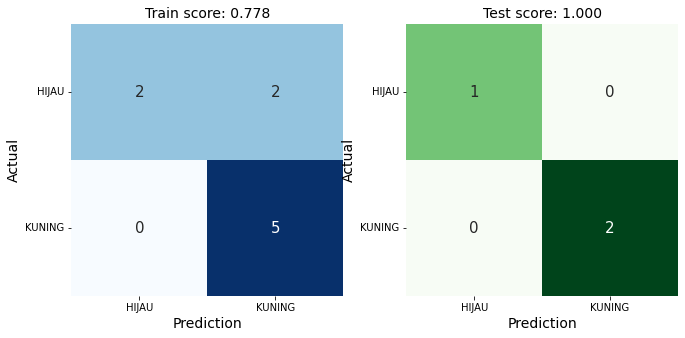

In [11]:
from jcopml.plot import plot_confusion_matrix
plot_confusion_matrix(X_train, y_train, X_test, y_test, pipeline)

# Prediksi

In [12]:
X_pred = pd.read_csv("data/datapredict.csv")
X_pred

,Suhu,Kelembaban,PH
0,10,40,NETRAL
1,23,45,ASAM
2,22,44,NETRAL
3,10,52,ASAM
4,36,46,ASAM


In [13]:
pipeline.predict(X_pred)

array(['HIJAU', 'HIJAU', 'HIJAU', 'HIJAU', 'KUNING'], dtype='<U6')

In [14]:
X_pred["Kesehatan"] = pipeline.predict(X_pred)
X_pred

,Suhu,Kelembaban,PH,Kesehatan
0,10,40,NETRAL,HIJAU
1,23,45,ASAM,HIJAU
2,22,44,NETRAL,HIJAU
3,10,52,ASAM,HIJAU
4,36,46,ASAM,KUNING
